In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv(r'C:\Users\HP\Downloads\SHAPEAI_Projects\PROJECTS-DATA-SCIENTIST-TRAINING-main\walmart Data Analysis\train_walmart.csv')

In [3]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [4]:
test_df = pd.read_csv(r'C:\Users\HP\Downloads\SHAPEAI_Projects\PROJECTS-DATA-SCIENTIST-TRAINING-main\walmart Data Analysis\test.csv')
features_df = pd.read_csv(r'C:\Users\HP\Downloads\SHAPEAI_Projects\PROJECTS-DATA-SCIENTIST-TRAINING-main\walmart Data Analysis\features.csv')
stores_df = pd.read_csv(r'C:\Users\HP\Downloads\SHAPEAI_Projects\PROJECTS-DATA-SCIENTIST-TRAINING-main\walmart Data Analysis\stores.csv')

In [5]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [8]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
stores_df.shape

(45, 3)

In [12]:
features_df.shape

(8190, 12)

In [13]:
train_df.shape

(421570, 5)

In [14]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [15]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [16]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [17]:
dataset = features_df.merge(stores_df, how='inner',on ='Store')

In [18]:
dataset

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [20]:
import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [21]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [22]:
final_df = train_df.merge(dataset,how='inner',on=['Store','Date','IsHoliday'])

In [23]:
final_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [24]:
final_df['Date'].dt.week


<ipython-input-24-12c66e3aa071>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  final_df['Date'].dt.week


0          5
1          5
2          5
3          5
4          5
          ..
421565    43
421566    43
421567    43
421568    43
421569    43
Name: Date, Length: 421570, dtype: int64

In [25]:
final_df['week'] = final_df['Date'].dt.week
final_df['year'] = final_df['Date'].dt.year

<ipython-input-25-0ea8886ff6c4>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  final_df['week'] = final_df['Date'].dt.week


In [26]:
final_df['Date'].dt.isocalendar().day

0         5
1         5
2         5
3         5
4         5
         ..
421565    5
421566    5
421567    5
421568    5
421569    5
Name: day, Length: 421570, dtype: UInt32

In [27]:
#### TASK : write a function that will make scatter plot of weekly sales and column you paasing in as argument- in argument to pass df, column_name

In [28]:
def scatter(df,col):
    plt.figure(figsize=(12,8))
    plt.scatter(x=df['Weekly_Sales'], y=df[col])
    plt.title("Weekly_Sales vs "+str(col))
    plt.xlabel("Weekly_Sales")
    plt.ylabel(col)


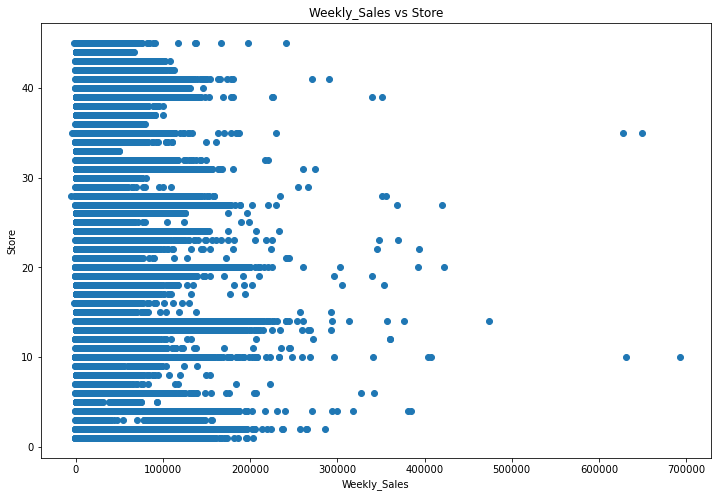

In [29]:
scatter(final_df,'Store')

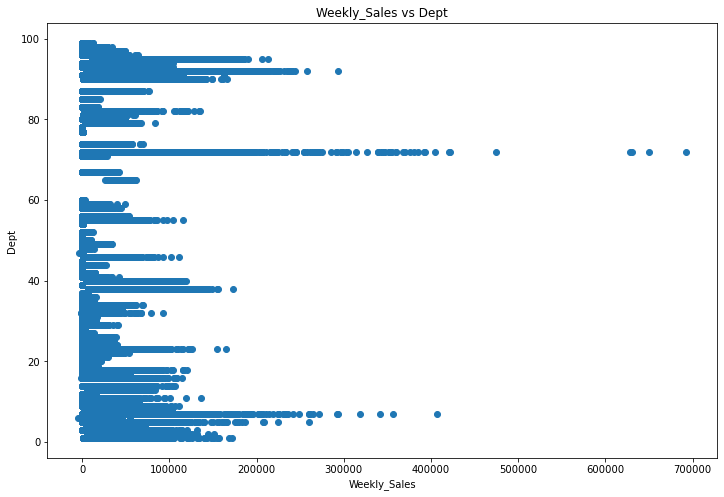

In [30]:
scatter(final_df,'Dept')

In [31]:
final_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week', 'year'],
      dtype='object')

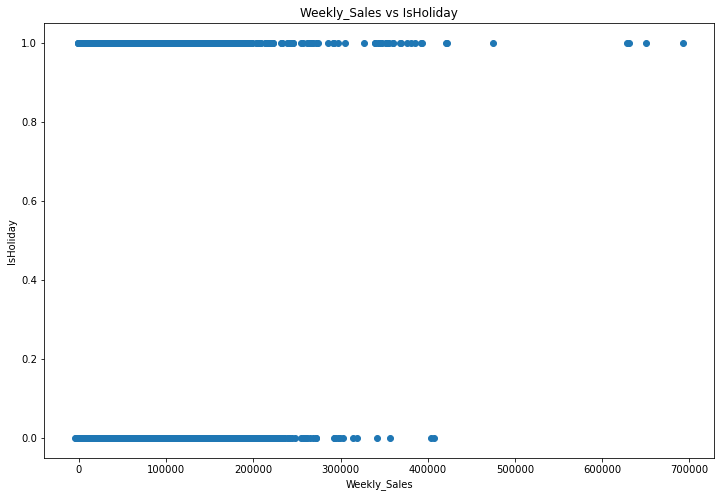

In [32]:
scatter(final_df,'IsHoliday')

In [33]:
## in year 2011 what is average sale weekly
weekly_sales_2011 = final_df[final_df['year'] == 2011].groupby(['week'])['Weekly_Sales'].mean()

In [35]:
weekly_sales_2012 = final_df[final_df['year'] == 2012].groupby(['week'])['Weekly_Sales'].mean()

In [36]:
weekly_sales_2010 = final_df[final_df['year'] == 2010].groupby(['week'])['Weekly_Sales'].mean()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week'>

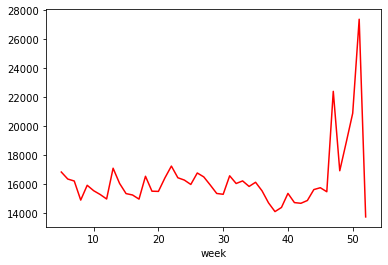

In [37]:
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color='red')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week'>

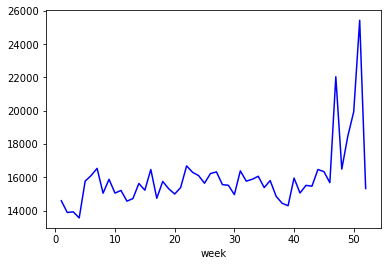

In [38]:
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color='blue')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week'>

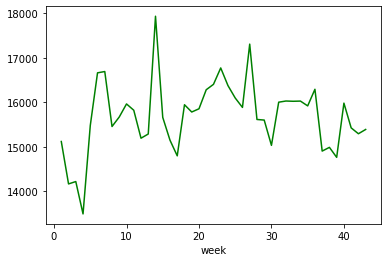

In [39]:
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color='green')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


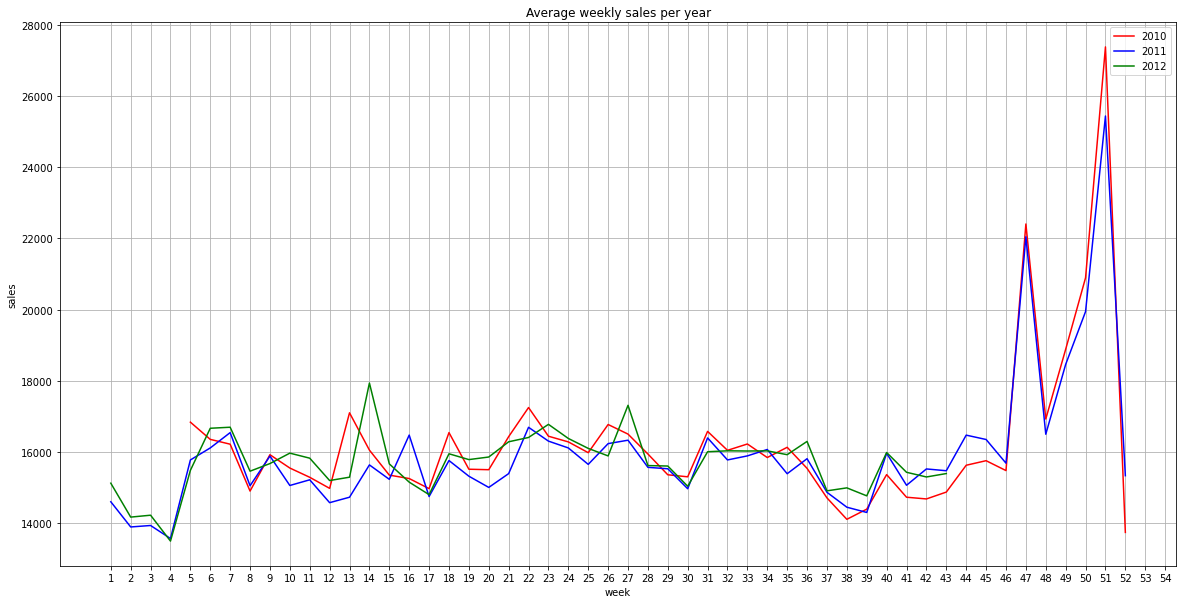

In [40]:
plt.figure(figsize = (20,10))
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values,color='red')
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values,color='blue')
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values,color='green')
plt.xticks(np.arange(1,55,step=1))
plt.grid()
plt.title('Average weekly sales per year')
plt.xlabel('week')
plt.ylabel('sales')
plt.legend(['2010','2011','2012'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

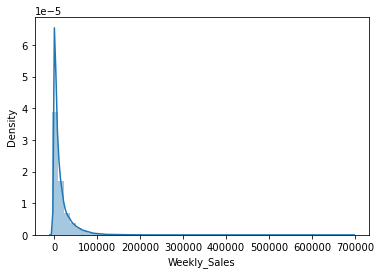

In [41]:
sns.distplot(final_df['Weekly_Sales'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

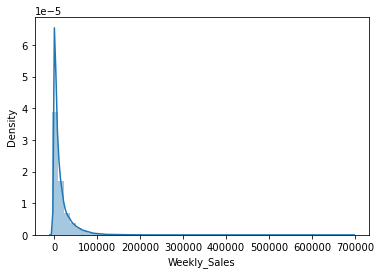

In [42]:
sns.distplot(final_df['Weekly_Sales'])

<AxesSubplot:xlabel='Type', ylabel='Size'>

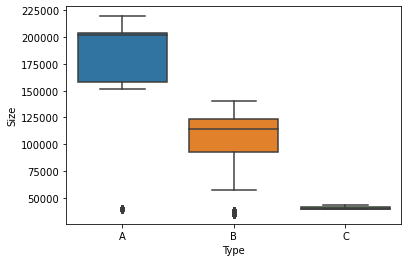

In [43]:
## box plot
## i wanted to find the relationship between store type and store size using box plot
sns.boxplot(x = 'Type',y ='Size',data = final_df)

In [44]:
### which store have highest weekly average sales.
weekly_store_sales = final_df['Weekly_Sales'].groupby(final_df['Store']).mean()

In [49]:
weekly_store_sales_df

,Weekly_Sales
Store,
1,21710.543621
2,26898.070031
3,6373.033983
4,29161.210415
5,5053.415813
6,21913.243624
7,8358.766148
8,13133.014768
9,8772.890379


In [46]:
weekly_store_sales_df = pd.DataFrame(weekly_store_sales)

In [48]:
weekly_store_sales_df

,Weekly_Sales
Store,
1,21710.543621
2,26898.070031
3,6373.033983
4,29161.210415
5,5053.415813
6,21913.243624
7,8358.766148
8,13133.014768
9,8772.890379


In [53]:
weekly_store_sales_df.sort_values("Weekly_Sales", ascending=False).style.bar(color = '#FFD200')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


In [55]:
## store 20 have the highest sales
## store 5 was having minimum sales

In [59]:
final_df[final_df['Store']== 20]['Type'].unique()

array(['A'], dtype=object)

In [60]:
final_df[final_df['Store']== 5]['Type'].unique()

array(['B'], dtype=object)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sales per store')

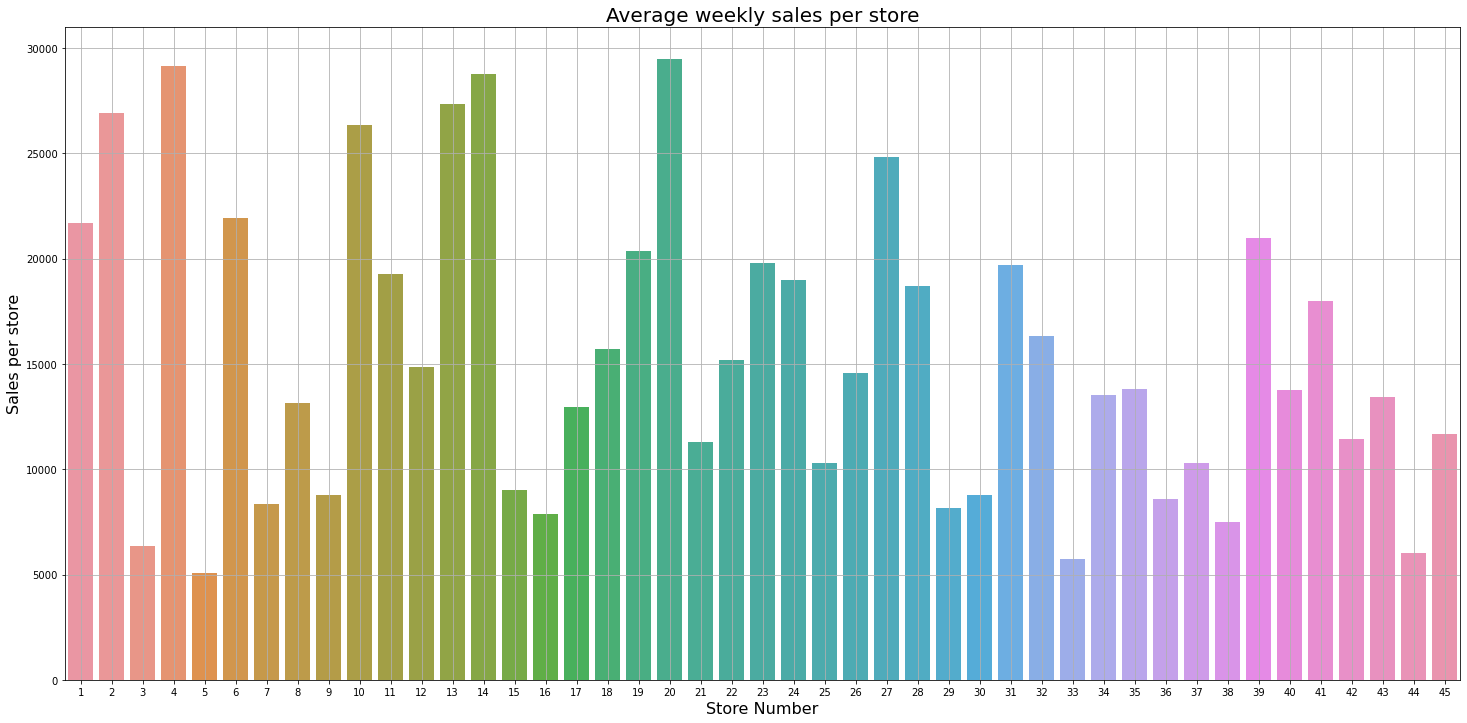

In [62]:
plt.figure(figsize =(25,12))
sns.barplot(weekly_store_sales.index,weekly_store_sales.values)
plt.grid()
plt.title('Average weekly sales per store', fontsize = 20)
plt.xlabel('Store Number', fontsize=16)
plt.ylabel('Sales per store', fontsize = 16)

In [63]:
## average weekly sales per department
weekly_sales_dept = final_df.groupby(['Dept'])['Weekly_Sales'].mean()

In [64]:
weekly_sales_dept

Dept
1     19213.485088
2     43607.020113
3     11793.698516
4     25974.630238
5     21365.583515
          ...     
95    69824.423080
96    15210.942761
97    14255.576919
98     6824.694889
99      415.487065
Name: Weekly_Sales, Length: 81, dtype: float64

In [65]:
weekly_sales_dept_df = pd.DataFrame(weekly_sales_dept)

In [66]:
weekly_sales_dept_df

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


In [68]:
weekly_sales_dept_df.sort_values('Weekly_Sales',ascending=False).style.bar()

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


In [69]:
## department 92 have highest sales
## 43 is having the lowest sales

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sales per Department')

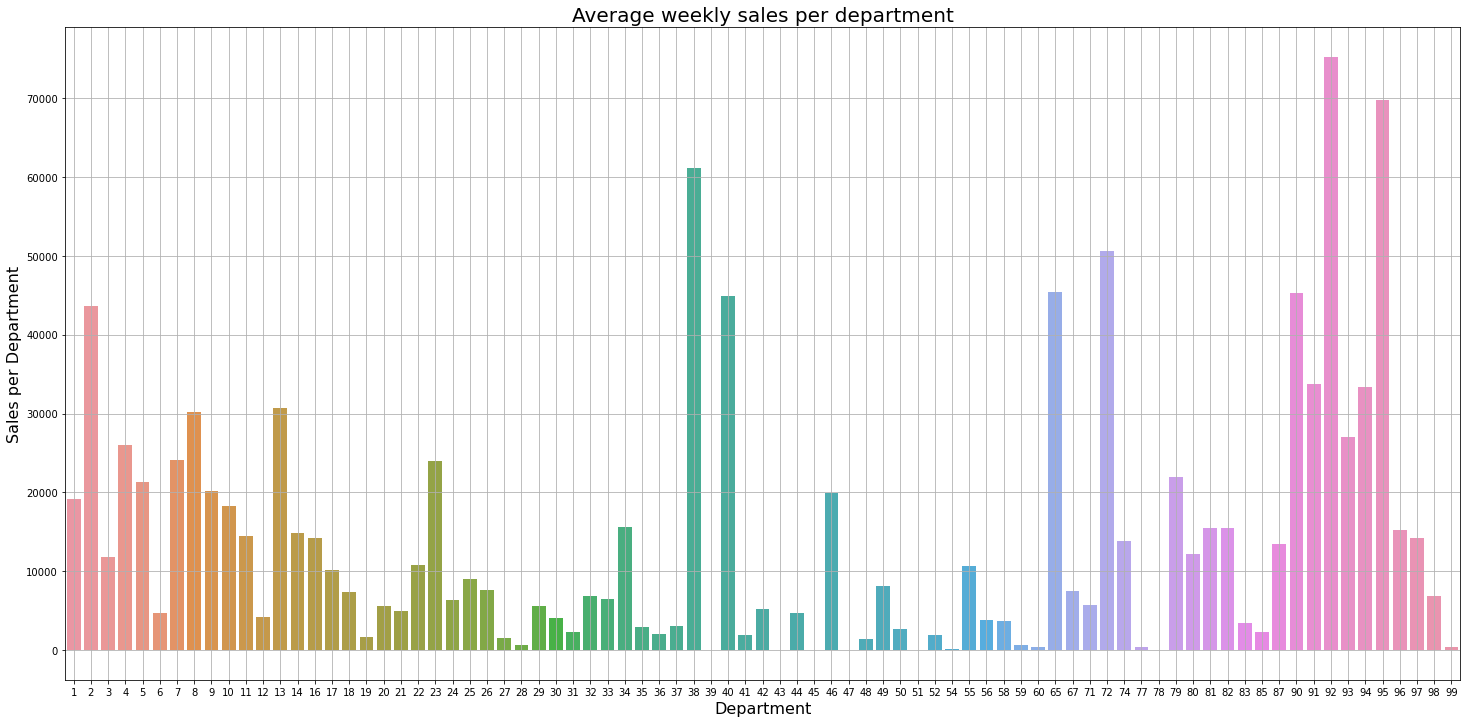

In [71]:
plt.figure(figsize =(25,12))
sns.barplot(weekly_sales_dept.index,weekly_sales_dept.values)
plt.grid()
plt.title('Average weekly sales per department', fontsize = 20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales per Department', fontsize = 16)

<AxesSubplot:>

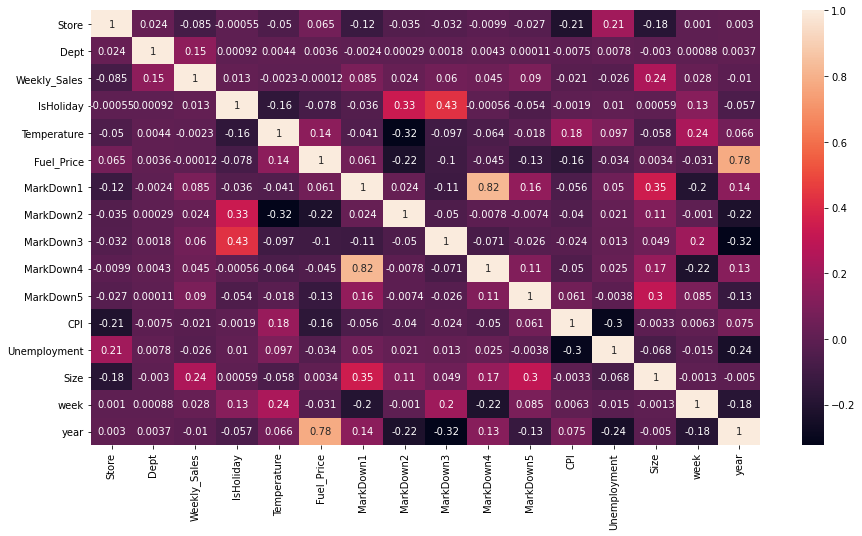

In [72]:
## correlation between features
plt.figure(figsize=(15,8))
sns.heatmap(final_df.corr(), annot=True)
